# Compare the results from different `kissim` runs

Compare results (kinase matrices) from different runs:

- `matrix1`: 2019 dataset
- `matrix2`: **Run on 20210508**; based on KLIFS dataset from 20210114; includes charged-THR bug
- `matrix3`: **Run on 20210701**; based on KLIFS dataset from 20210630

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

In [2]:
HERE = Path(_dh[-1])  # noqa: F821
RESULTS = HERE / "../../results/"
RESULTS_ARCHIVE = HERE / "../../results_archive/"

In [3]:
matrix1 = pd.read_csv(RESULTS_ARCHIVE / "kinsim_structure_results2/data/best_scores_type2_normballester.csv", index_col=0)
matrix1 = 1 - matrix1
for kinase_name in matrix1.columns:
    matrix1.loc[kinase_name, kinase_name] = 0.0
matrix2 = pd.read_csv(RESULTS_ARCHIVE / "20210508/fingerprint_distances_to_kinase_matrix.csv", index_col=0)
matrix3 = pd.read_csv(RESULTS / "fingerprint_distances_to_kinase_matrix.csv", index_col=0)

print(matrix1.shape)
print(matrix2.shape)
print(matrix3.shape)

(253, 253)
(292, 292)
(292, 292)


In [4]:
kinase_names = sorted(set(matrix1.columns) & set(matrix2.columns) & set(matrix3.columns))
len(kinase_names)

252

In [5]:
matrix1 = matrix1.loc[kinase_names, kinase_names]
matrix2 = matrix2.loc[kinase_names, kinase_names]
matrix3 = matrix3.loc[kinase_names, kinase_names]
print(matrix1.shape)
print(matrix2.shape)
print(matrix3.shape)

(252, 252)
(252, 252)
(252, 252)


## Compare matrices

### Distribution

In [6]:
matrix1.max().max(), matrix1.min().min()

(0.5519626078860608, 0.0)

In [7]:
matrix2.max().max(), matrix2.min().min()

(1.094769161705495, 0.0)

In [8]:
matrix3.max().max(), matrix3.min().min()

(1.089961469397803, 0.0)

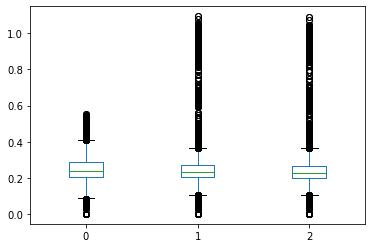

In [9]:
pd.concat([matrix1.unstack(), matrix2.unstack(), matrix3.unstack()], axis=1).plot(kind="box");

### Difference

In [10]:
def matrix_diff(df1, df2, title):
    
    display(Markdown(f"#### {title}"))
    df_diff = df1 - df2
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    sns.heatmap(df_diff, ax=ax, square=True, center=0, cmap="PiYG")
    fig, ax = plt.subplots(1, 2, figsize=(7, 3))
    df_diff["LOK"].plot(kind="hist", ax=ax[0], title="Difference for LOK")
    df_diff["SLK"].plot(kind="hist", ax=ax[1], title="Difference for SLK")

#### Between matrix 1 and 2

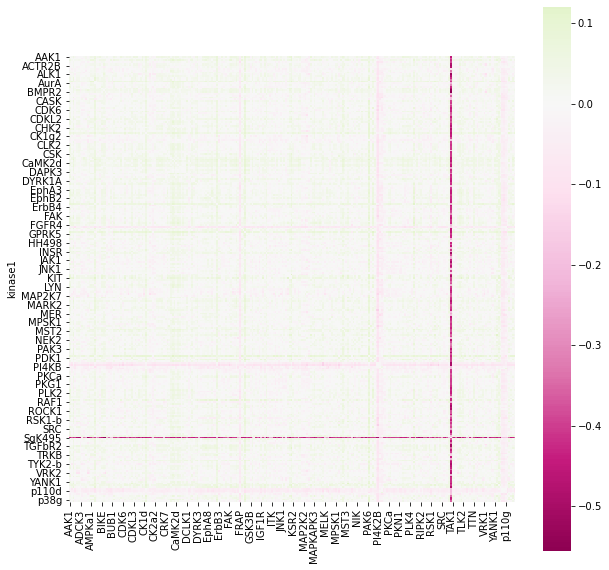

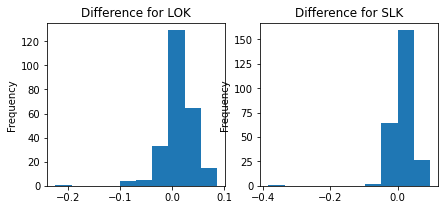

In [11]:
matrix_diff(matrix1, matrix2, "Between matrix 1 and 2")

#### Between matrix 2 and 3

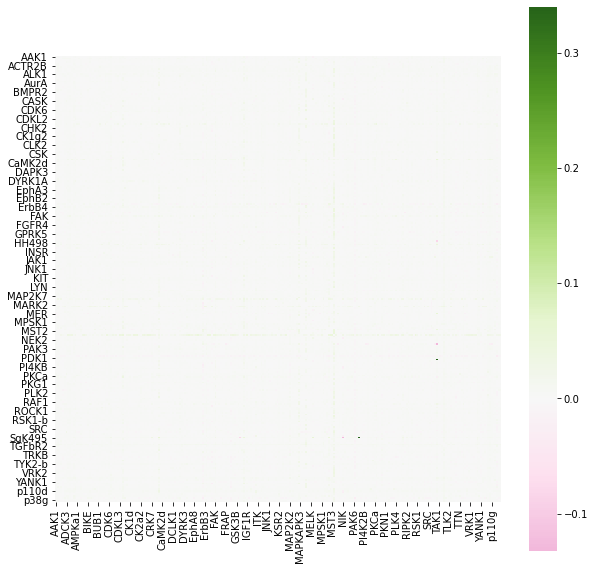

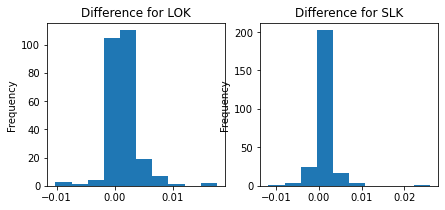

In [12]:
matrix_diff(matrix2, matrix3, "Between matrix 2 and 3")

In [13]:
matrix_diff = matrix1 - matrix2
pair_diff = matrix_diff.unstack()
pair_diff[pair_diff.apply(lambda x: (-0.01 > x) | (x > 0.01))]

        kinase1
AAK1    ABL1       0.012552
        ABL2       0.051034
        ACK        0.018943
        ACTR2     -0.016379
        ADCK3     -0.012472
                     ...   
p70S6K  p110d     -0.072490
        p110g     -0.047361
        p38a      -0.021987
        p38d      -0.011132
        p38g       0.033779
Length: 44774, dtype: float64

### Correlation

Correlation of colums between both matrices.

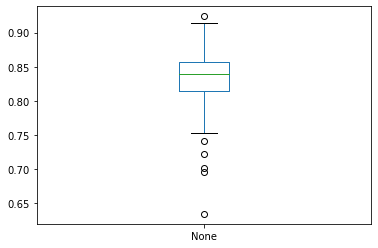

In [14]:
matrix1.corrwith(matrix2, axis=0).plot(kind="box");

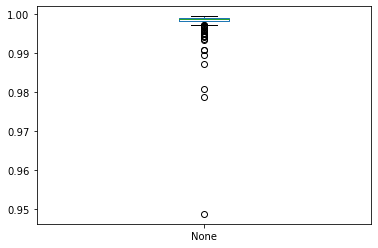

In [15]:
matrix2.corrwith(matrix3, axis=0).plot(kind="box");